# My Notes

- **Course**: Qubits, entanglement and matrix product sates
- **Author**: Théo HUET
- **Date**: 16/01/2026 - 21/01/2026

# TD1 - One, two and many qubits: Density matrices, purity and entanglement

## Exercice 1 : Time evolution of entanglement

We consider a system of **two interacting qubits** in the state :

$|\Psi > = |01>$

The **Hamiltonian** is given by:

$ H = - J \sigma_x \otimes \sigma_x + \frac{\pi}{4} \sigma_y \otimes Id + \frac{1}{2} Id \otimes \sigma_z $

We study the unitary dynamics of a two-qubit system
and analyze the generation of entanglement.

### Initialisation :

In [40]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

import constants

# Physical parameters
J = 1.0

def initialization(J : float) :
  # Hamiltonian
  H = -J*np.kron(constants.X,constants.X) + np.pi/4 * np.kron(constants.Y,constants.I) + 0.5 * np.kron(constants.I,constants.Z)

  # compute evolution operator
  U = expm(1j*H*constants.dt)
  Ud = np.conj(np.transpose(U)) #U dagger

  # initialization of lists for measurements
  purity, entropy_A, averageEnergy = [], [], []

  return purity, entropy_A, averageEnergy, H, U, Ud

# initial state
va = np.array([1,0]) #|0>
vb = np.array([0,1]) #|1>
psi0 = np.kron(va,vb) #|01>
rho0 = np.outer(psi0,np.conjugate(psi0)) #|01><01|
# or   np.kron(psi0.conjugate(psi0)).reshape(4,4)


### Calculation of quantities to be measured

**Average energy calculation :**

$<H> = Tr(H\rho(t))$

**Entropy calculation :**

$S_A(t) = -Tr(\rho_A(t) \log(\rho_A(t)))$

but we will use :

$S_A(t) = - \Sigma^2_{i=1} \lambda_i(t) \log(\lambda_i(t))$  *where the* $\lambda_i(t)$ *are the eigenvalues of* $\rho_i(t)$.

To avoid problems with the log, we will use an $\epsilon = 10^{-8}$ in the eigenvalues expression : $\lambda'_i(t) = |\lambda_i(t)| + \epsilon$

**Purity calculation :**

$P_A = Tr(\rho_A(t)^2)$

In [41]:
def measurements_averageEnergy(H : np.array, rho : np.array) : # <H>
  return np.trace(H @ rho)

def measurements_entropy(rho : np.array) : # S
  eigenValues = np.abs(np.linalg.eigvals(rho)) + constants.epsilon  # with epsilon = 1e-8, this avoids numerical instability issues
  return  -np.sum(eigenValues * np.log(eigenValues))

def measurements_purity(rho : np.array) : # P
  return np.trace(rho @ rho)

### Discretized temporary evolution loop :

At each time step $t_n$, we calculate $\rho(t_n) = U \rho(t_{n-1})U^\dagger $.

In [42]:
def evolution_loop(J : float, rho0 : np.array, Nt : int) :
  # initialization of all the parameters we will need
  purity, entropy_A, averageEnergy, H, U, Ud = initialization(J)

  rho = rho0
  for _ in range(Nt) :
    # Unitary time evolution of the density matrix
    rho = U @ rho @ Ud
    rho_A = rho[0:2,0:2] + rho[2:4,2:4] # partial trace of rho(t)

    # average energy calculation (to verify that it is conserved and that our simulation is stable)
    averageEnergy.append(measurements_averageEnergy(H, rho))

    # entropy calculation
    entropy_A.append(measurements_entropy(rho_A))

    # purity calculation
    purity.append(measurements_purity(rho_A))
  return purity, entropy_A, averageEnergy

purity, entropy_A, averageEnergy = evolution_loop(J, rho0, constants.Nt)

### Plot :

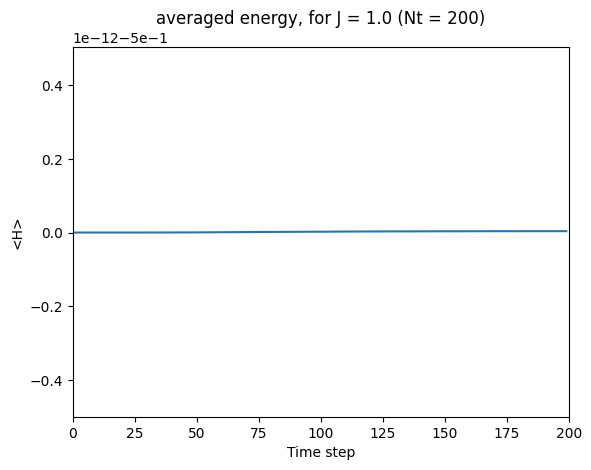

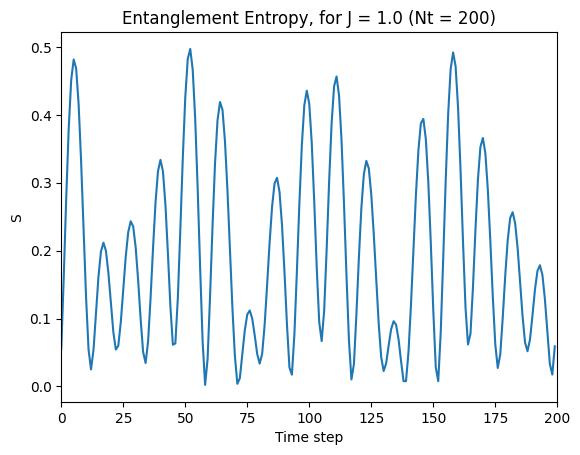

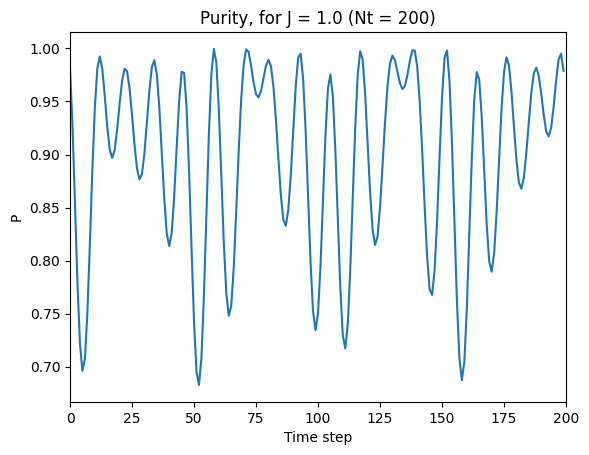

In [43]:
def plot_results(J : float,
                 y1 : list, y2: list = [],
                 title : str = "" , ylabel : str = "y" ,
                 show_plot=False) :
  plt.figure()
  plt.plot(y1)
  plt.plot(y2,alpha=0.2)
  plt.xlabel("Time step")
  plt.ylabel(ylabel)
  plt.title(title + ", for J = " + str(J) + " (Nt = " + str(constants.Nt) + ")")
  plt.xlim(0,constants.Nt)
  if show_plot :
    plt.show()

plot_results(J, averageEnergy, title="averaged energy", ylabel="<H>", show_plot=True) # energy conservation figure
plot_results(J, entropy_A, title="Entanglement Entropy", ylabel="S", show_plot=True) # entropy figure
plot_results(J, purity, title="Purity", ylabel="P", show_plot=True) # purity figure


The entanglement entropy exhibits strong temporal oscillations,
which are characteristic of unitary dynamics in a finite quantum system.

Due to the highly oscillatory behavior of the observables,
we also compute their time-averaged values defined as:

$\overline{f}(T) = \frac{1}{T} \int_0^T f(t)\, dt$

### Time averaged values as function of T :

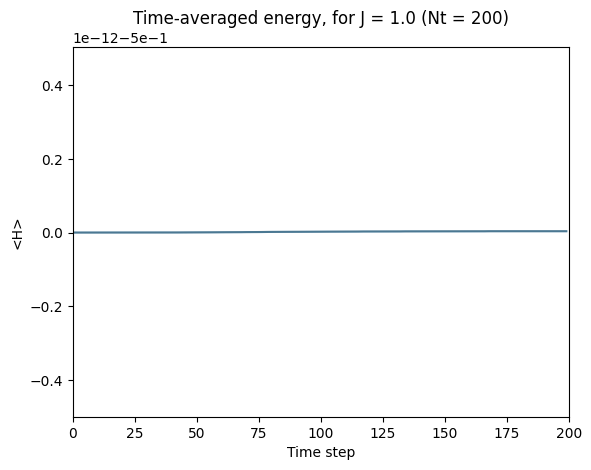

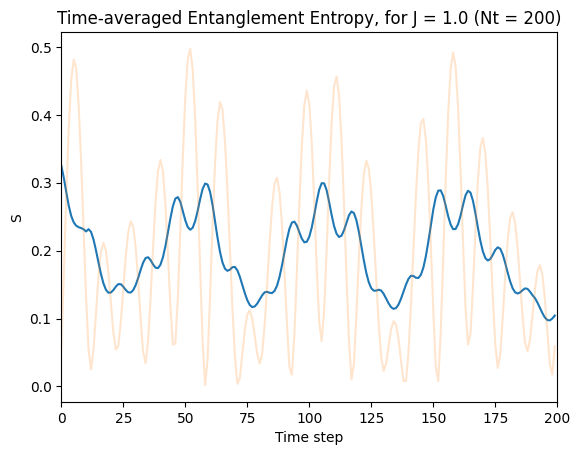

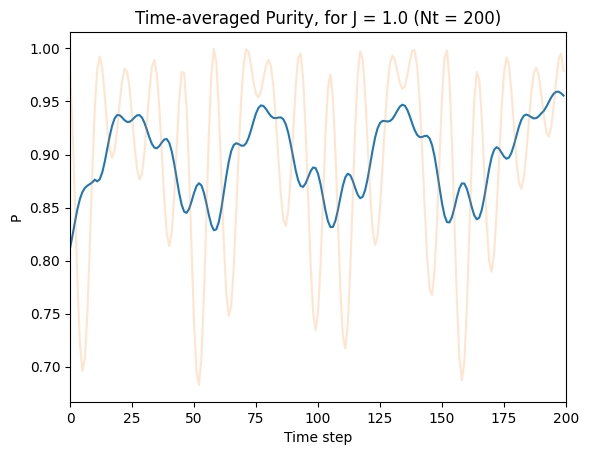

In [44]:
def time_averaged_values(averageEnergy : list, entropy_A : list, purity : list) :
  averageEnergy_T, entropy_A_T, purity_T = [], [], [] # initialization of lists for measurements
  T = int(constants.Nt *constants.dt)
  for n in range(constants.Nt):
    previous_Tn = n-T//2 if n-T//2 > 0 else 0
    next_Tn = n+T//2 if n+T//2 < constants.Nt else constants.Nt

    averageEnergy_T.append(np.mean(averageEnergy[previous_Tn:next_Tn]))
    entropy_A_T.append(np.mean(entropy_A[previous_Tn:next_Tn]))
    purity_T.append(np.mean(purity[previous_Tn:next_Tn]))
  return averageEnergy_T, entropy_A_T, purity_T

averageEnergy_T, entropy_A_T, purity_T = time_averaged_values(averageEnergy, entropy_A, purity)

plot_results(J, averageEnergy_T, averageEnergy, title="Time-averaged energy", ylabel="<H>", show_plot=True) # Time-averaged energy conservation figure
plot_results(J, entropy_A_T, entropy_A, title="Time-averaged Entanglement Entropy", ylabel="S", show_plot=True) # Time-averaged entropy figure
plot_results(J, purity_T, purity, title="Time-averaged Purity", ylabel="P", show_plot=True) #Time-averaged purity figure


The time-averaged observables display a much smoother behavior
and tend towards stationary values.
This averaging allows us to extract the long-time properties of the system.

To further our analysis, we now extend the simulation to a range of coupling strengths $J$. By comparing these different regimes, we can observe how the interaction strength dictates the speed of decoherence and the stabilization levels of our observables. The following animation illustrates this transition across multiple values of $J$.

## A range of coupling strengths $J$ :


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


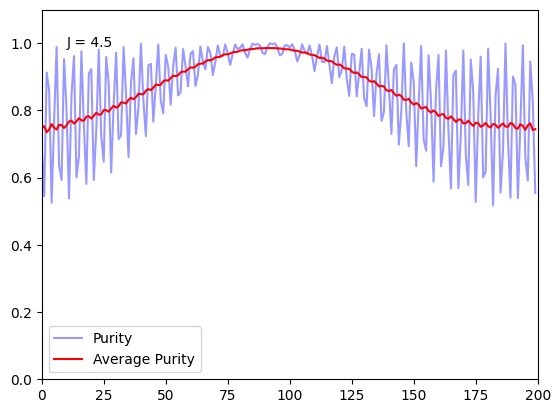

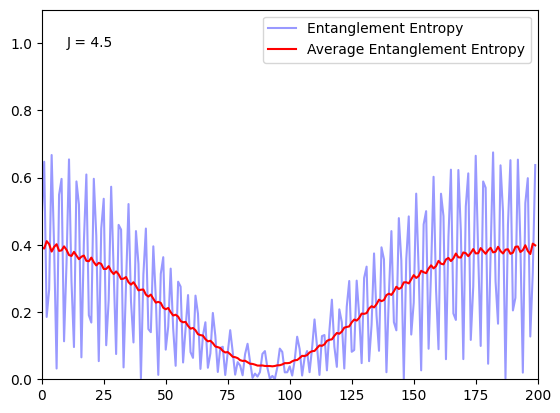

In [45]:
from matplotlib.animation import FuncAnimation

# Listes pour stocker TOUTES les données de chaque J
all_purity, all_purity_T = [], []
all_averageEnergy, all_averageEnergy_T = [], []
all_entropy_A, all_entropy_A_T = [], []

all_J_values = np.arange(-5, 5, 0.5) # tout les J que l'on va tester
for J in all_J_values :
  purity, entropy_A, averageEnergy = evolution_loop(J, rho0, constants.Nt)

  averageEnergy_T, entropy_A_T, purity_T = time_averaged_values(averageEnergy, entropy_A, purity)

  all_purity.append(purity)
  all_purity_T.append(purity_T)
  all_averageEnergy.append(averageEnergy)
  all_averageEnergy_T.append(averageEnergy_T)
  all_entropy_A.append(entropy_A)
  all_entropy_A_T.append(entropy_A_T)

def plot_results_animation(all_J_values : list,
                           y1 : list, y2: list,
                           title : str = "" ,
                           save_plot = False, show_plot=False) :
  fig, ax = plt.subplots()
  line1, = ax.plot([], [], label=title, color="blue", alpha=0.4)
  line2, = ax.plot([], [], label= "Average " + title, color="red")
  text_j = ax.text(0.05, 0.9, '', transform=ax.transAxes)

  def update(frame):
    # 'frame' est l'index de la simulation (index de J)
    line1.set_data(range(constants.Nt), y1[frame])
    line2.set_data(range(constants.Nt), y2[frame])
    text_j.set_text(f'J = {all_J_values[frame].round(2)}')
    return line1, line2, text_j

  ax.set_xlim(0, constants.Nt)
  ax.set_ylim(0, 1.1)
  ax.legend()

  # Création de l'animation
  ani = FuncAnimation(fig, update, frames=len(all_J_values), interval=500, blit=True)
  if save_plot :
    title = title.replace(" ", "_")
    title = "td1_ex1_plot_" + title + ".gif"
    ani.save(title, writer='pillow')
  if show_plot :
    plt.show()

save_plot = True # Pour sauvegarder en GIF
show_plot = False

plot_results_animation(all_J_values,all_purity, all_purity_T, title="Purity", save_plot = save_plot, show_plot = show_plot)
plot_results_animation(all_J_values,all_entropy_A, all_entropy_A_T, title="Entanglement Entropy", save_plot = save_plot, show_plot = show_plot)







---

## Exercice 2 : Entanglement area law and critical scaling

Now we have L quibits with the transverse fiel Ising Hamiltonian with PBC :

$H = \Sigma^L_{j=1} (\sigma^z_j\sigma^z_{j+1} + h\sigma^x_j)$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compute_H(L : int, h : float) :
  H = np.zeros((2**L,2**L), dtype=complex)
  for j in range(L) :
    next_j = (j+1) % L
    for site in range(2**L) :
      if site == j or site == next_j :
        op = constants.Z
      else :
        op = constants.I
      # a completer...
  return H